Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [2]:
library('tidymodels')

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.5      ✔ recipes      1.0.10
✔ dials        1.2.1      ✔ rsample      1.2.1 
✔ dplyr        1.1.4      ✔ tibble       3.2.1 
✔ ggplot2      3.5.1      ✔ tidyr        1.3.1 
✔ infer        1.0.7      ✔ tune         1.2.1 
✔ modeldata    1.3.0      ✔ workflows    1.1.4 
✔ parsnip      1.2.1      ✔ workflowsets 1.1.0 
✔ purrr        1.0.2      ✔ yardstick    1.3.1 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [3]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [4]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 10, 10, 1, 1, 13, 5, 5, 4, 11, 3, 7, 7, 7,…
$ Glucose                  <dbl> 85, 115, 139, 103, 97, 145, 117, 109, 103, 13…
$ BloodPressure            <dbl> 66, 0, 80, 30, 66, 82, 92, 75, 60, 76, 64, 84…
$ SkinThickness            <dbl> 29, 0, 0, 38, 15, 19, 0, 26, 33, 0, 25, 0, 18…
$ Insulin                  <dbl> 0, 0, 0, 83, 140, 110, 0, 0, 192, 0, 70, 0, 0…
$ BMI                      <dbl> 26.6, 35.3, 27.1, 43.3, 23.2, 22.2, 34.1, 36.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.134, 1.441, 0.183, 0.487, 0.245, 0.3…
$ Age                      <dbl> 31, 29, 57, 33, 22, 57, 38, 60, 33, 35, 26, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The outcome variable is predicting whether or not a patient has diabetes based on clinical results.

❓ Navigate to [Kaggle page]() for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |     Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
| BMI         |        Body mass index (weight in kg/(height in m)^2)     |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

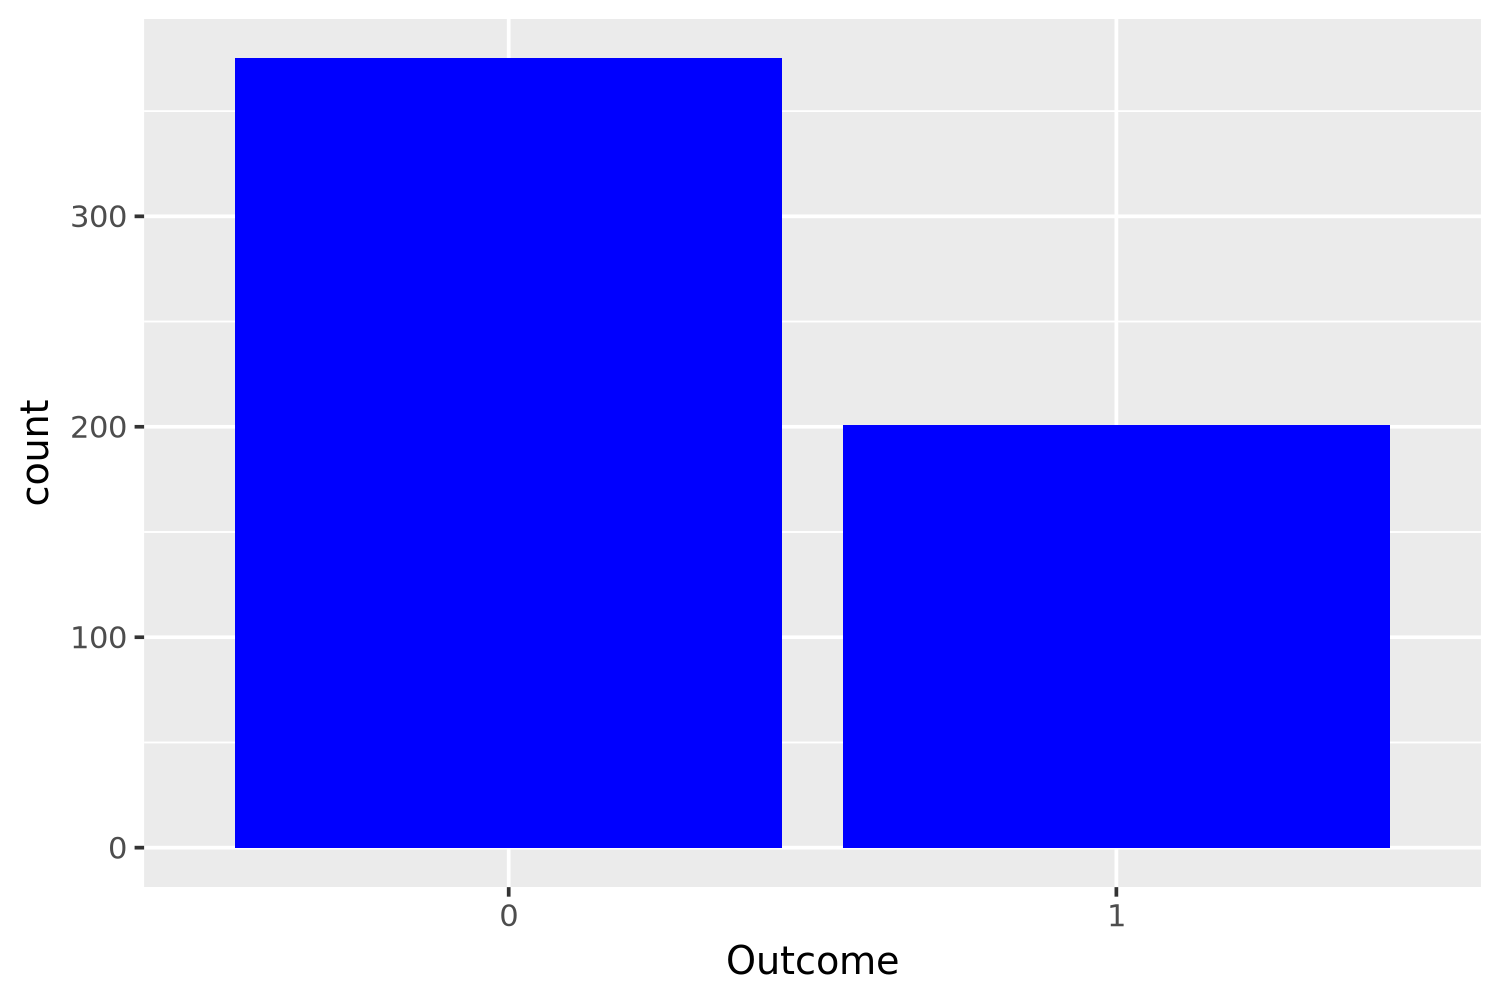

In [5]:
options(repr.plot.height = 4, repr.plot.width = 6)

ggplot(diabetes_train, aes(x=Outcome)) + geom_bar(na.rm=T,fill= 'blue')

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

No, the data is not balanced.  There are twice as many patients not diagnosed with diabetes than who are.



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [6]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,115.0
0,BMI,35.3
0,Glucose,139.0
0,BMI,27.1


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

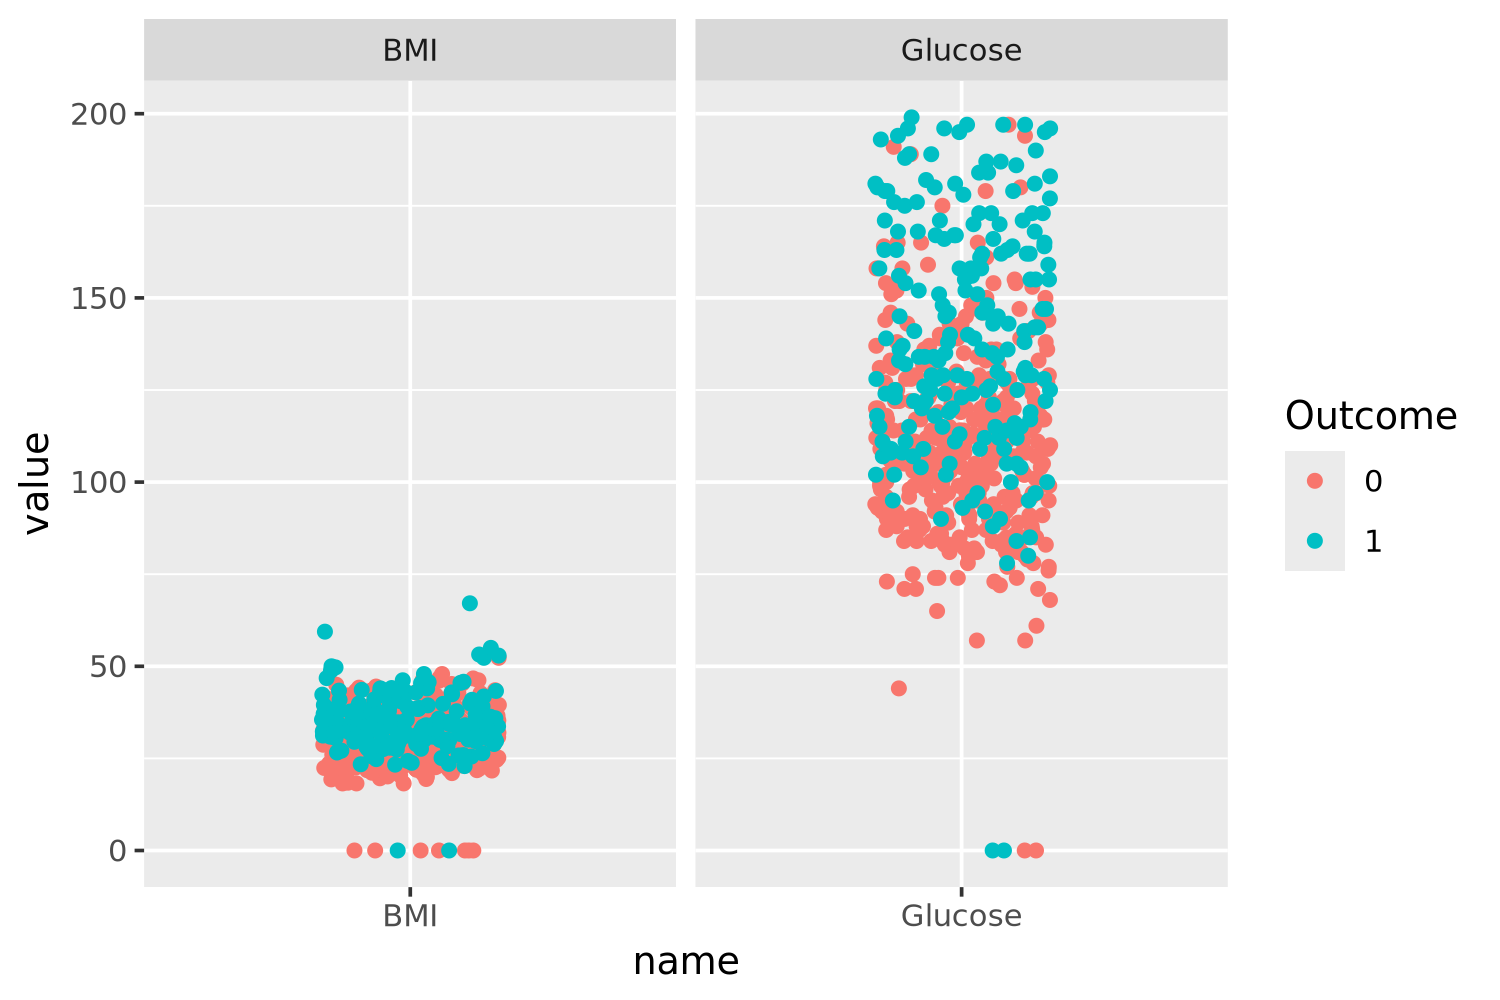

In [7]:
options(repr.plot.height = 4, repr.plot.width = 6)

ggplot(plot_df, aes(x = name, y = value, color = Outcome)) + 
    geom_point(na.rm = T, position = position_jitter(height = 0, width = 0.2)) +
    facet_wrap(~name, ncol = 2, scales = 'free_x')

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

When you remove the scales = 'free_x' from the argument in the facet_wrap function, x=name shows BMI and Glucose twice, regardless if there is no data.  Its best to have the argument included to only show the data that is needed.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [21]:
rec = recipe(Outcome ~ BMI + Glucose, data = diabetes_train) |>
    prep()

rec



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Training information 

Training data contained 576 data points and no incomplete rows.



In [22]:
rec |> juice() |> head()

BMI,Glucose,Outcome
<dbl>,<dbl>,<fct>
26.6,85,0
35.3,115,0
27.1,139,0
43.3,103,0
23.2,97,0
22.2,145,0


In [23]:
mod = logistic_reg() |> set_engine('glm')

In [29]:
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, data = diabetes_train)

tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.24284393,0.686979994,-10.543020,5.471306e-26
BMI,0.06973736,0.014977109,4.656263,3.219999e-06
Glucose,0.03488041,0.003783752,9.218471,3.013678e-20


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabeted_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [34]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)
diabetes_test_wPred |> head()

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.8983357,0.1016643,1,89,66,23,94,28.1,0.167,21,0
1,0.3678498,0.6321502,0,137,40,35,168,43.1,2.288,33,1
0,0.8039930,0.1960070,5,116,74,0,0,25.6,0.201,30,0
0,0.6865145,0.3134855,4,110,92,0,0,37.6,0.191,30,0
0,0.5267829,0.4732171,3,126,88,41,235,39.3,0.704,27,0
0,0.7893448,0.2106552,8,99,84,0,0,35.4,0.388,50,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [35]:
diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 110  30
         1  15  37

In [42]:
diabetes_test |>
    group_by (Outcome) |>
    count (Outcome)

Outcome,n
<fct>,<int>
0,125
1,67


❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data? 67
- Of those that actually had diabetes, how many were predicted to have diabetes by your model? 37
- How many individuals predicted to have diabetes did not have diabetes? 15

**Answer:**

67
37
15

